0.07216878364870322
0.0721687836487032
0.09622504486493764
0.09622504486493764
0.09622504486493764


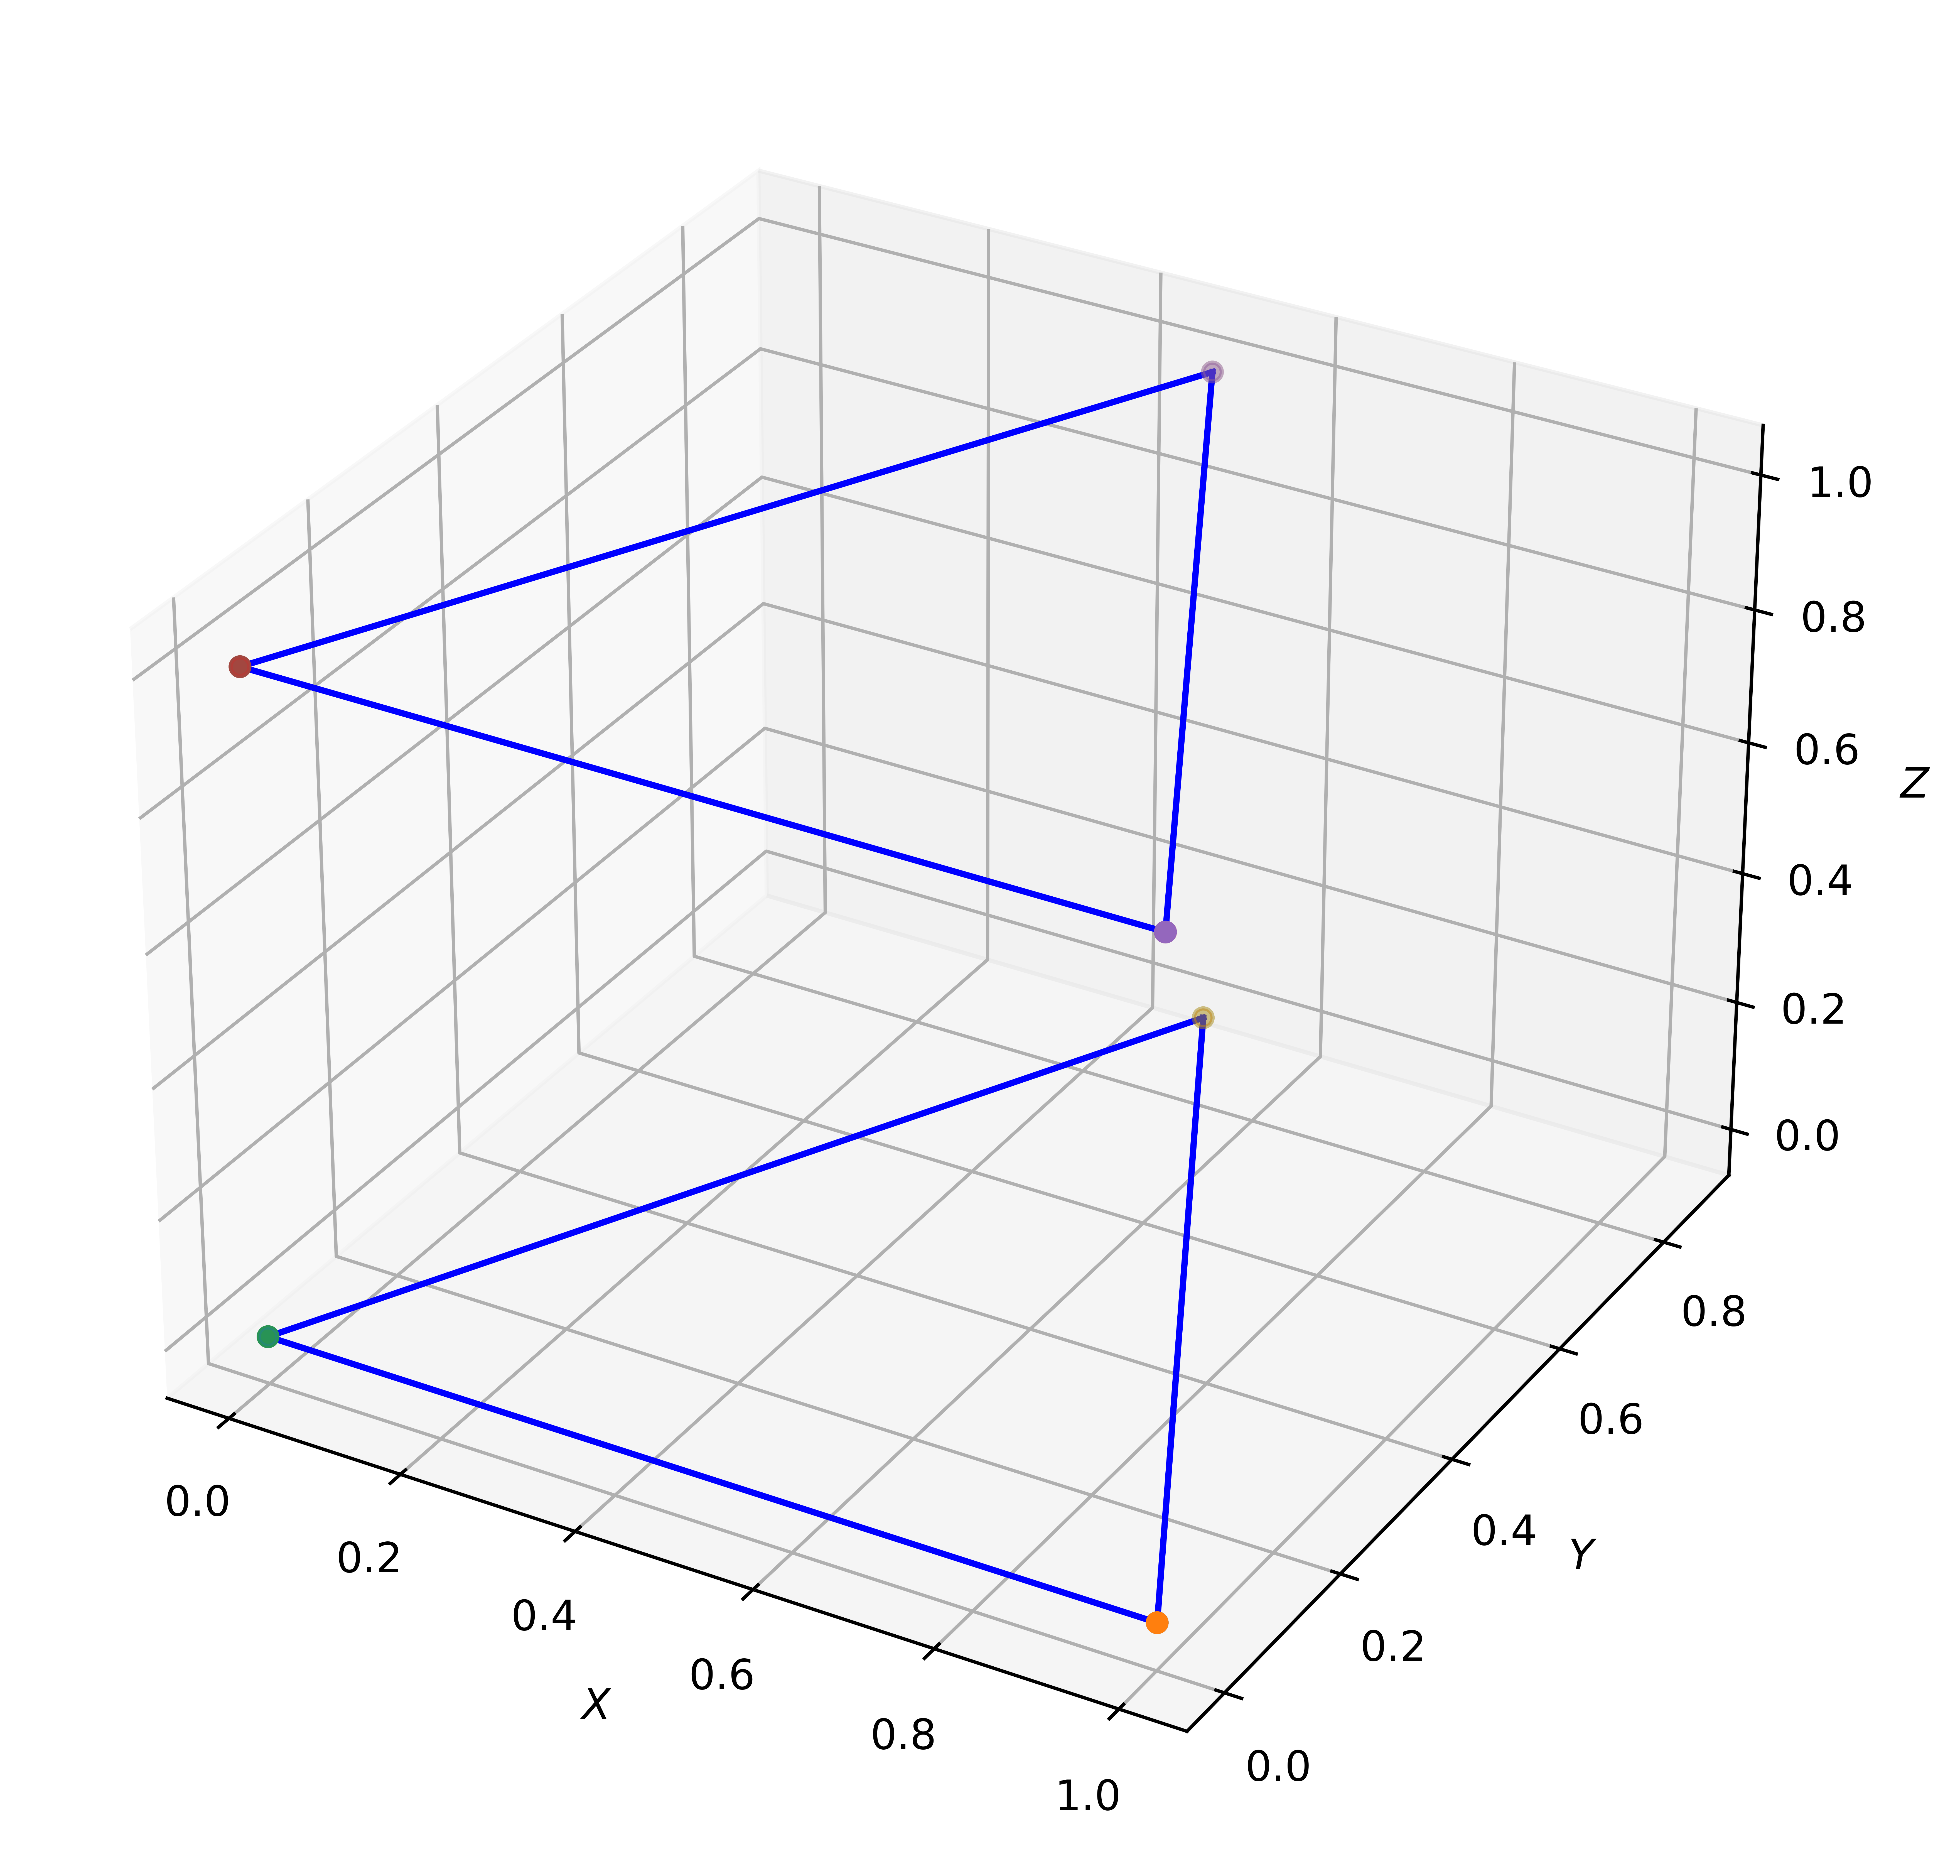

In [1]:
from classes import *
#%matplotlib inline
from functions import plotter_3D
from pyvtk import *

a=1
b=1
h=0

#initialize

u0=Vertex([0,0,0])
u1=Vertex([a,0,0])
u2=Vertex([a/2,np.sqrt(3)*a/2,0])
v0=Vertex([0,0,b])
v1=Vertex([a,0,b])
v2=Vertex([a/2,np.sqrt(3)*a/2,b])

w0=Vertex([a/2,a/(2*np.sqrt(3)),b/2-h])
w1=Vertex([a/2,a/(2*np.sqrt(3)),b/2+h])

t0=Vertex([a/2-h*np.cos(np.pi/6),a/(2*np.sqrt(3))-h*np.sin(np.pi/6),b/2])
t1=Vertex([a/2+h*np.cos(np.pi/6),a/(2*np.sqrt(3))-h*np.sin(np.pi/6),b/2])
t2=Vertex([a/2,np.sqrt(3)*a/2+h,b/2])


eu01=Edge([u0,u1])
eu12=Edge([u1,u2])
eu20=Edge([u2,u0])

ev01=Edge([v0,v1])
ev12=Edge([v1,v2])
ev20=Edge([v2,v0])

euv0=Edge([u0,v0])
euv1=Edge([u1,v1])
euv2=Edge([u2,v2])

eu0w=Edge([u0,w0])
eu1w=Edge([u1,w0])
eu2w=Edge([u2,w0])

ev0w=Edge([v0,w1])
ev1w=Edge([v1,w1])
ev2w=Edge([v2,w1])

ew=Edge([w0,w1])

eut0=Edge([u0,t0])
eut1=Edge([u1,t1])
eut2=Edge([u2,t2])

evt0=Edge([v0,t0])
evt1=Edge([v1,t1])
evt2=Edge([v2,t2])

et01=Edge([t0,t1])
et12=Edge([t1,t2])
et20=Edge([t2,t0])


pu=Polygon([eu01,eu12, eu20])
pv=Polygon([ev01,ev12, ev20])
pu01w=Polygon([eu01,eu0w,eu1w])
pu12w=Polygon([eu12,eu1w,eu2w])
pu20w=Polygon([eu20,eu2w,eu0w])
pv01w=Polygon([ev01,ev0w,ev1w])
pv12w=Polygon([ev12,ev1w,ev2w])
pv20w=Polygon([ev20,ev2w,ev0w])
p0w=Polygon([euv0,eu0w,ev0w,ew])
p1w=Polygon([euv1,eu1w,ev1w,ew])
p2w=Polygon([euv2,eu2w,ev2w,ew])

puv01=Polygon([eu01,ev01,euv0,euv1])
puv12=Polygon([eu12,ev12,euv1,euv2])
puv20=Polygon([eu20,ev20,euv2,euv0])

pt=Polygon([et01,et12,et20])
pt0=Polygon([eut0,evt0,euv0])
pt1=Polygon([eut1,evt1,euv1])
pt2=Polygon([eut2,evt2,euv2])

put01=Polygon([eu01,et01,eut0,eut1])
put12=Polygon([eu12,et12,eut1,eut2])
put20=Polygon([eu20,et20,eut2,eut0])

pvt01=Polygon([ev01,et01,evt0,evt1])
pvt12=Polygon([ev12,et12,evt1,evt2])
pvt20=Polygon([ev20,et20,evt2,evt0])


c1=Polyhedron([pu,pu01w,pu12w,pu20w])
c2=Polyhedron([pv,pv01w,pv12w,pv20w])
d1=Polyhedron([puv01,pu01w,pv01w,p0w,p1w])
d2=Polyhedron([puv12,pu12w,pv12w,p1w,p2w])
d3=Polyhedron([puv20,pu20w,pv20w,p2w,p0w])

#a1=Polyhedron([put01,put12,put20,pt,pu])
#a2=Polyhedron([pvt01,pvt12,pvt20,pt,pv])
#b1=Polyhedron([pt0,put01,pvt01,pt1])
#b2=Polyhedron([pt1,put12,pvt12,pt2])
#b3=Polyhedron([pt2,put20,pvt20,pt0])

c1.v_0=c1.volume()
c2.v_0=c2.volume()
d1.v_0=d1.volume()
d2.v_0=d2.volume()
d3.v_0=d3.volume()



    
print(c1.volume())
print(c2.volume())
print(d1.volume())
print(d2.volume())
print(d3.volume())

plotter_3D([eu01,eu12, eu20,ev01,ev12, ev20])


In [36]:
points=[u0.coordinates, u1.coordinates,    u2.coordinates,    v0.coordinates, v1.coordinates,   v2.coordinates,    w0.coordinates,    w1.coordinates,
    t0.coordinates,    t1.coordinates,
    t2.coordinates]

polygons=[[0,1,2],[3,4,5],[0,1,6],[1,2,6],[2,0,6],[3,4,7],[4,5,7],[5,3,7],[0,1,3,4],[1,2,4,5],[2,0,5,3]]

pointdata=PointData(\
    Scalars([0,1,2,3,4,5,6,7,8,9,10],
    name="idk why i need this"))

celldata=CellData(\
    Scalars([0,1,2,3,4,5,6,7,8,9,10]),
    Normals([[0,0,-1],[0,0,1],[0,0,-1],[0,0,-1],[0,0,-1],[0,0,-1],[0,0,-1],[0,0,-1],[0,0,-1],[0,0,-1],[0,0,-1]])

)


In [37]:
structure= PolyData(points,polygons)

#vtk=VtkData(structure, pointdata,celldata)

vtk=VtkData(structure)

vtk.tofile("example1","ascii")

In [2]:
# This function returns the five cells in the h configuration
# given the parameters.
def update_vertices(a,b,h):
    u0.coordinates=[0,0,0]
    u1.coordinates=[a,0,0]
    u2.coordinates=[a/2,np.sqrt(3)*a/2,0]
    v0.coordinates=[0,0,b]
    v1.coordinates=[a,0,b]
    v2.coordinates=[a/2,np.sqrt(3)*a/2,b]
    
    w0.coordinates=[a/2,a/(2*np.sqrt(3)),(b/2)-h]
    w1.coordinates=[a/2,a/(2*np.sqrt(3)),(b/2)+h]

    t0.coordinates=[h*np.cos(np.pi/6),h*np.sin(np.pi/6),b/2]
    t1.coordinates=[a-h*np.cos(np.pi/6),h*np.sin(np.pi/6),b/2]
    t2.coordinates=[a/2,np.sqrt(3)*a/2-h,b/2]


def update_edges():
    eu01.vertices=[u0,u1]
    eu12.vertices=[u1,u2]
    eu20.vertices=[u2,u0]
    
    ev01.vertices=[v0,v1]
    ev12.vertices=[v1,v2]
    ev20.vertices=[v2,v0]
    
    euv0.vertices=[u0,v0]
    euv1.vertices=[u1,v1]
    euv2.vertices=[u2,v2]

    eu0w.vertices=[u0,w0]
    eu1w.vertices=[u1,w0]
    eu2w.vertices=[u2,w0]
    
    ev0w.vertices=[v0,w1]
    ev1w.vertices=[v1,w1]
    ev2w.vertices=[v2,w1]


    
    ew.vertices=[w0,w1]

    eut0.vertices=[u0,t0]
    eut1.vertices=[u1,t1]
    eut2.vertices=[u2,t2]

    evt0.vertices=[v0,t0]
    evt1.vertices=[v1,t1]
    evt2.vertices=[v2,t2]

    et01.vertices=[t0,t1]
    et12.vertices=[t1,t2]
    et20.vertices=[t2,t0]


    return

def update_polygons():
    pu.edges=[eu01,eu12, eu20]
    pv.edges=[ev01,ev12, ev20]    
    pu01w.edges=[eu01,eu0w,eu1w]
    pu12w.edges=[eu12,eu1w,eu2w]
    pu20w.edges=[eu20,eu2w,eu0w]
    pv01w.edges=[ev01,ev0w,ev1w]
    pv12w.edges=[ev12,ev1w,ev2w]
    pv20w.edges=[ev20,ev2w,ev0w]
    p0w.edges=[euv0,eu0w,ev0w,ew]
    p1w.edges=[euv1,eu1w,ev1w,ew]
    p2w.edges=[euv2,eu2w,ev2w,ew]

    puv01.edges=[eu01,ev01,euv0,euv1]
    puv12.edges=[eu12,ev12,euv1,euv2]
    puv20.edges=[eu20,ev20,euv2,euv0]

    pt.edges=[et01,et12,et20]
    pt0.edges=[eut0,evt0,euv0]
    pt1.edges=[eut1,evt1,euv1]
    pt2.edges=[eut2,evt2,euv2]

    put01.edges=[eu01,et01,eut0,eut1]
    put12.edges=[eu12,et12,eut1,eut2]
    put20.edges=[eu20,et20,eut2,eut0]

    pvt01.edges=[ev01,et01,evt0,evt1]
    pvt12.edges=[ev12,et12,evt1,evt2]
    pvt20.edges=[ev20,et20,evt2,evt0]


def update_polyhedrons():    
    c1.polygons=[pu,pu01w,pu12w,pu20w]
    c2.polygons=[pv,pv01w,pv12w,pv20w]
    d1.polygons=[puv01,pu01w,pv01w,p0w,p1w]
    d2.polygons=[puv12,pu12w,pv12w,p1w,p2w]
    d3.polygons=[puv20,pu20w,pv20w,p2w,p0w]
    
    #a1.polygons=[put01,put12,put20,pt,pu]
    #a2.polygons=[pvt01,pvt12,pvt20,pt,pv]
    #b1.polygons=[pt0,put01,pvt01,pt1]
    #b2.polygons=[pt1,put12,pvt12,pt2]
    #b3.polygons=[pt2,put20,pvt20,pt0]
    return

def update_all(a,b,h):
    update_vertices(a,b,h)
    update_edges()
    update_polygons()
    update_polyhedrons()
    return
    

In [3]:
print(c1.volume())
print(c2.volume())
print(d1.volume())
print(d2.volume())
print(d3.volume())




0.07216878364870322

In [12]:
a=2
b=20
h=10
update_all(a,b,h)
print(c1.volume())
print(c2.volume())
print(d1.volume())
print(d2.volume())
print(d3.volume())

0.0
5.697667218914275e-16
11.547005383792518
11.54700538379252
11.547005383792515


In [ ]:
plotter_3D([])